In [2]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("tempDataset/testRegression.csv") 

# Preview the first 5 lines of the loaded data 
data.head()

,id,dt,accel_x,accel_y,accel_z,accel_angle_x,accel_angle_y,accel_angle_z,angle_x,angle_y,angle_z,phase
0,0,0.000,812.0,1480.0,17836.0,4.74,-2.60,0.0,0.19,-0.10,0.00,0.0
1,1,0.065,864.0,1196.0,17992.0,3.80,-2.74,0.0,0.32,-0.31,0.13,0.0
2,2,0.064,836.0,1436.0,18256.0,4.49,-2.61,0.0,0.33,-0.45,0.13,0.0
3,3,0.066,688.0,2136.0,18760.0,6.49,-2.09,0.0,0.50,-0.73,0.25,0.0
4,4,0.064,1128.0,1056.0,18040.0,3.34,-3.57,0.0,0.80,-0.83,0.13,0.0


In [5]:
data[data['phase'] == 0]

In [11]:
def linear_regression(x, y):
#     plt.plot(x, y, 'o', color='blue');
#     plt.show()
    #ref: https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0
    df = pd.DataFrame(
        {'X': x,
         'y': y}
    )

    # Calculate the mean of X and y
    xmean = np.mean(x)
    ymean = np.mean(y)

    # Calculate the terms needed for the numator and denominator of beta
    df['xycov'] = (df['X'] - xmean) * (df['y'] - ymean)
    df['xvar'] = (df['X'] - xmean)**2

    # Calculate beta and alpha
    beta = df['xycov'].sum() / df['xvar'].sum()
    alpha = ymean - (beta * xmean)
    print(f'alpha = {alpha}')
    print(f'beta = {beta}')
    
    ypred = alpha + beta * x
    plt.figure(figsize=(12, 6))
    plt.plot(x, ypred)     # regression line
    plt.plot(x, y, 'ro')   # scatter plot showing actual data
    plt.title('Actual vs Predicted')
    plt.xlabel('X')
    plt.ylabel('y')

    plt.show()

In [12]:
phase_data = []
phase_data.append(data[data['phase'] == 0])
phase_data.append(data[data['phase'] == 1])

alpha = -347.41961074931874
beta = -269.83421074798866


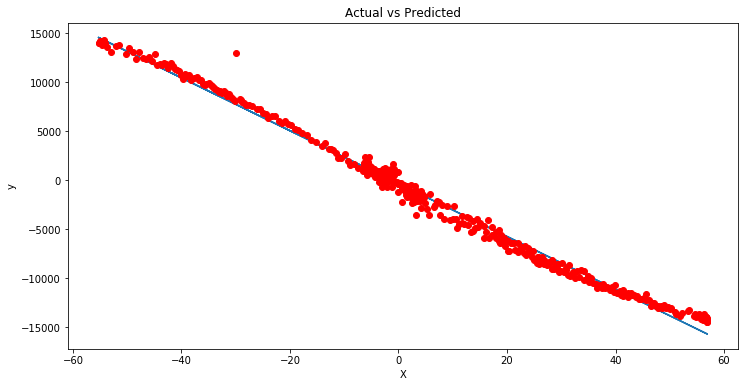

alpha = 202.35429408818322
beta = 263.1750648194081


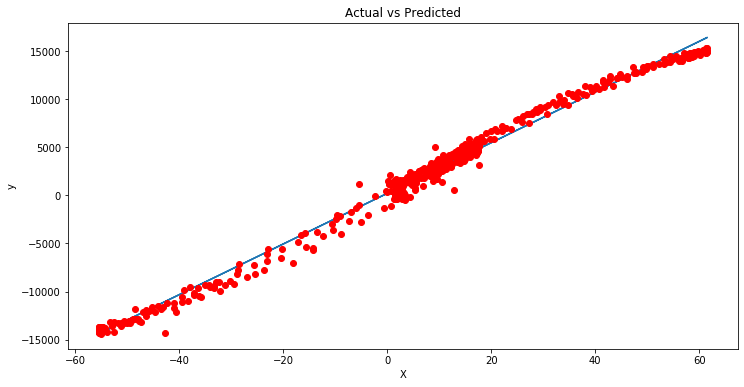

In [13]:
for x,y in [[phase_data[0]['angle_y'], phase_data[0]['accel_x']],[phase_data[0]['angle_x'], phase_data[0]['accel_y']]]:
    linear_regression(x, y)

alpha = -171.54238460878605
beta = -266.3824673655789


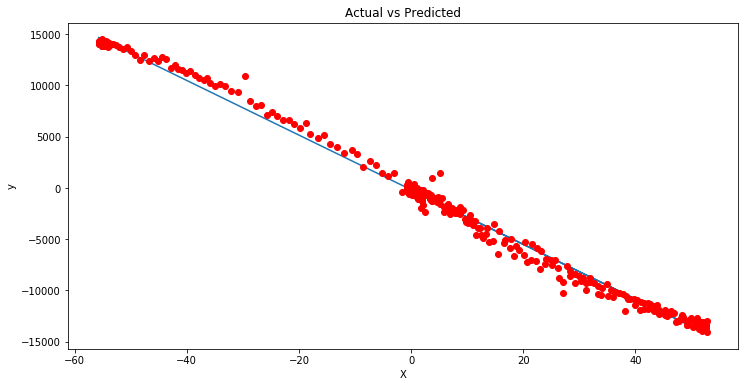

alpha = 699.8924305692772
beta = 255.0226836261239


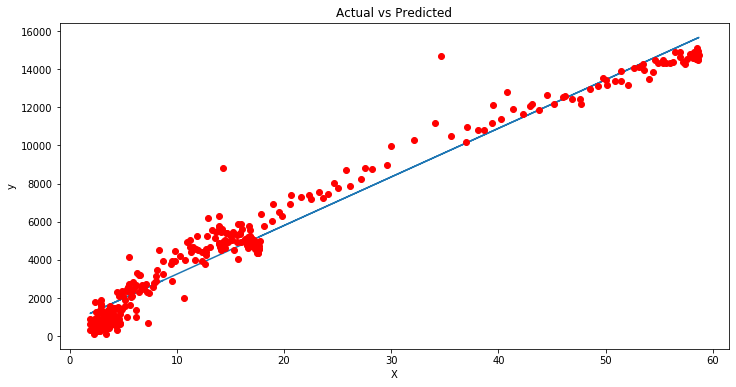

In [14]:
for x,y in [[phase_data[1]['angle_y'], phase_data[1]['accel_x']],[phase_data[1]['angle_x'], phase_data[1]['accel_y']]]:
    linear_regression(x, y)

In [13]:
# x = data['accel_z']
# y = data['angle_x']
# plt.plot(x, y, 'o', color='blue');

In [14]:
# x = data['accel_z']
# y = data['angle_y']
# plt.plot(x, y, 'o', color='blue');

In [14]:
# may be improve with polynomial regression degree=3
# https://towardsdatascience.com/polynomial-regression-bbe8b9d97491